In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from pathlib import Path

from api_integrated_llm.helpers.file_helper import get_dict_from_json


current_path = os.path.abspath(os.path.join("."))

obj = get_dict_from_json(file_path=Path(os.path.join(current_path, "data", "shortlisting_win_rate.json")))

In [3]:
model_dict = {}
for model_name_pcs, content in obj.items():
    pct = int(model_name_pcs.split("_")[-1][:-3])
    model_name = model_name_pcs.split("_")[0]
    if model_name not in model_dict:
        model_dict[model_name] = []
    model_dict[model_name].append((pct, content["total_micro"]["win_rate"]))

for model_name in model_dict.keys():
    sorted_data = sorted(model_dict[model_name], key=lambda unit: unit[0])
    model_dict[model_name] = {"x": list(map(lambda unit: unit[0], sorted_data)), "y": list(map(lambda unit: unit[1], sorted_data))}
print(model_dict)

{'gpt-4o': {'x': [10, 25, 50, 75, 100], 'y': [0.632991318074191, 0.6085240726124704, 0.547136563876652, 0.5516969218626677, 0.5011838989739542]}, 'llama-3-3-70b': {'x': [10, 25, 50, 75, 100], 'y': [0.5698500394632992, 0.531965272296764, 0.47750591949486976, 0.4664561957379637, 0.4214680347277032]}, 'mixtral-8x22B': {'x': [10, 25, 50, 75, 100], 'y': [0.5288082083662194, 0.46882399368587213, 0.3930544593528019, 0.3354380426203631, 0.32359905288082086]}}


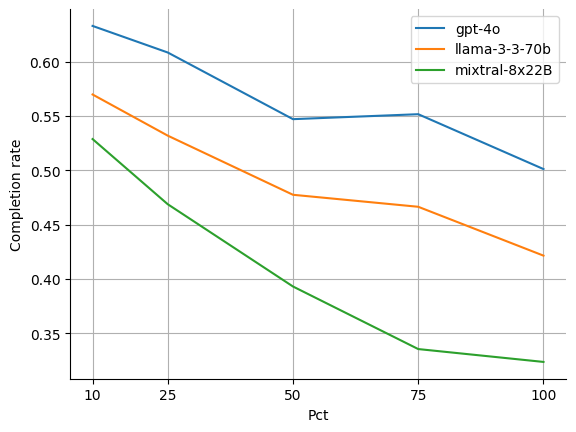

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
current_model_name = ""
for model_name, content in model_dict.items():
    current_model_name = model_name
    plt.plot(content["x"], content["y"], label=model_name)
plt.xlabel("Pct")
plt.ylabel("Completion rate")
ax.set_xticks(model_dict[model_name]["x"])
ax.set_xticklabels(model_dict[model_name]["x"])
plt.legend()
plt.grid()
current_axes = plt.gca()
current_axes.spines['top'].set_visible(False)
current_axes.spines['right'].set_visible(False)
plt.savefig('rest_pct_model_win_rate_set.svg', bbox_inches='tight')
plt.savefig('rest_pct_model_win_rate_set.png', bbox_inches='tight')